# Entrenamiento de un Perceptrón Multi-Capa con datos de dígitos (MNIST)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras import regularizers
import matplotlib.pyplot as plt
tf.random.set_seed(42)

## Carga de los datos
#### Tamaño del conjunto de entrenamiento y de test

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(' -Entradas Entrenamiento:', X_train.shape)
print(' -Salidas Entrenamiento:', y_train.shape)
print(' -Entradas Test:', X_test.shape)
print(' -Salidas Test:', y_test.shape)

 -Entradas Entrenamiento: (60000, 28, 28)
 -Salidas Entrenamiento: (60000,)
 -Entradas Test: (10000, 28, 28)
 -Salidas Test: (10000,)


#### Visualización de las entradas

Valores de salida correspondientes a las imágenes de entrada [5 0 4]


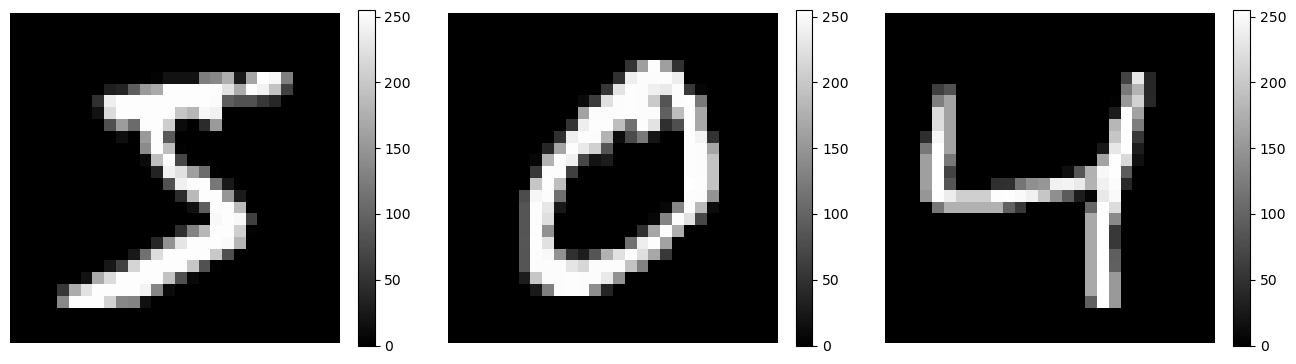

In [3]:
n_img_show = 3

# Plot images
plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

print(f'Valores de salida correspondientes a las imágenes de entrada {y_train[0:n_img_show]}')

## Preparación de los datos
#### Normalización

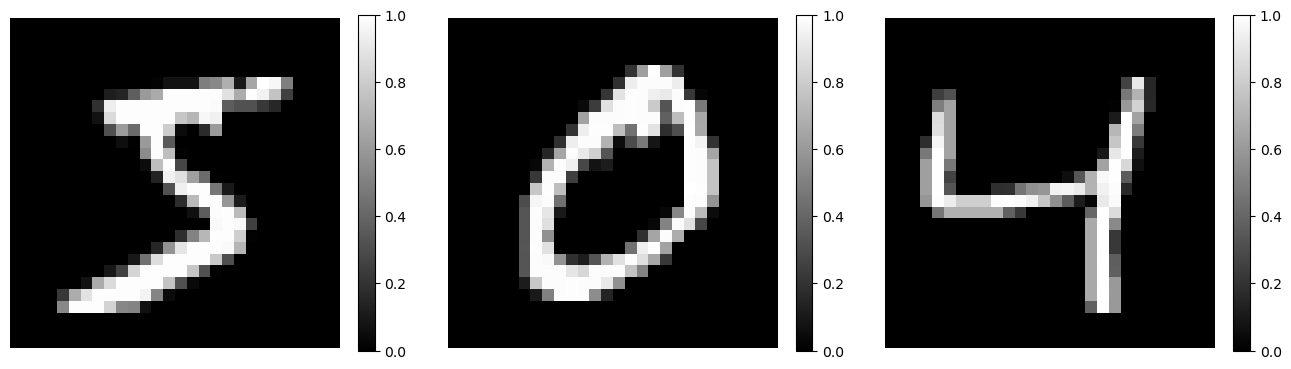

In [4]:
# Normalizamos a valores entre 0 y 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

#### Reajuste del tamaño de la entrada y la salida

El MLP no es capaz de analizar arrays de más de 1D -> hay que hacer un flatten

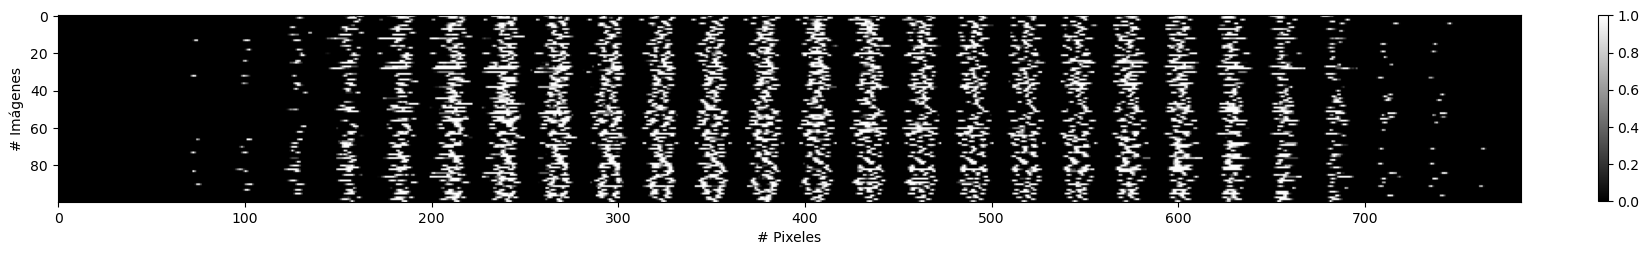

In [5]:
x_shape = X_train.shape
X_train = X_train.reshape(x_shape[0], x_shape[1]*x_shape[2])
X_test = X_test.reshape(len(X_test), x_shape[1]*x_shape[2])
y_train = y_train[:, None]
y_test = y_test[:, None]

# Dibujar la nueva entrada
plt.figure(figsize=(20, 70))
plt.imshow(X_train[0:100], cmap='gray')
plt.xlabel('# Pixeles')
plt.ylabel('# Imágenes')
plt.colorbar(fraction=0.006);

## Definición del modelo
Crea un modelo con las siguientes capas:
1. Capa de entrada con tantas entradas como número de píxeles (784) 
2. Capa oculta con 256 neuronas
3. Capa oculta con 128 neuronas
4. Capa oculta con 64 neuronas
5. Capa oculta con 32 neuronas
6. Capa de salidad con tantas neuronas como salidas (10)

Todas las capas usan función de activación relu (menos la de salida). ¿Qué función de activación hay que poner a la salida?


In [6]:
# Algunos hiper-parámetros
lr = .001
batch_size = 512
n_epochs = 35
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Crear modelo
model = tf.keras.models.Sequential()
model.add(Dense(units = 256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))


# Visualizar arquitectura y dimensiones
model.summary()

# Compilamos el modelo: ¿Qué función de coste hay que utilizar?
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


2024-05-23 09:26:48.523111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 09:26:48.523902: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Entrenamiento del modelo

In [7]:
hist = model.fit(X_train, 
                 y_train, 
                 batch_size=batch_size, 
                 epochs=n_epochs, 
                 verbose=1, 
                 shuffle=True,
                 validation_data=(X_test, y_test))

Epoch 1/35
118/118 [==============================] - 3s 16ms/step - loss: 0.4673 - accuracy: 0.8666 - val_loss: 0.2082 - val_accuracy: 0.9378
Epoch 2/35
118/118 [==============================] - 2s 17ms/step - loss: 0.1610 - accuracy: 0.9532 - val_loss: 0.1357 - val_accuracy: 0.9589
Epoch 3/35
118/118 [==============================] - 3s 22ms/step - loss: 0.1129 - accuracy: 0.9666 - val_loss: 0.1026 - val_accuracy: 0.9680
Epoch 4/35
118/118 [==============================] - 2s 18ms/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.0926 - val_accuracy: 0.9709
Epoch 5/35
118/118 [==============================] - 2s 15ms/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0894 - val_accuracy: 0.9719
Epoch 6/35
118/118 [==============================] - 2s 13ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0772 - val_accuracy: 0.9767
Epoch 7/35
118/118 [==============================] - 1s 11ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0792 - val_accuracy: 0.9756

### Dibujar las curvas de entrenamiento/validación

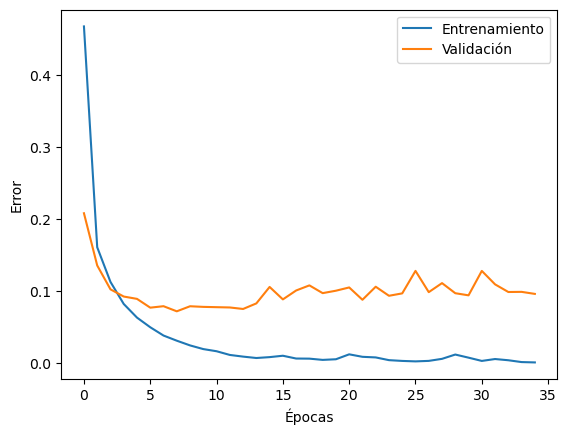

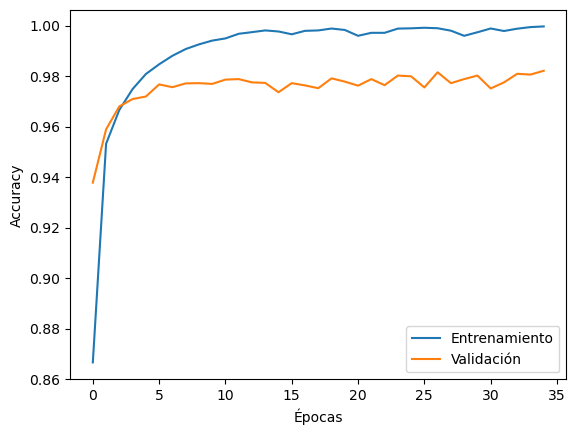

In [8]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right');

plot_curves(hist.history)

### Visualización de los pesos

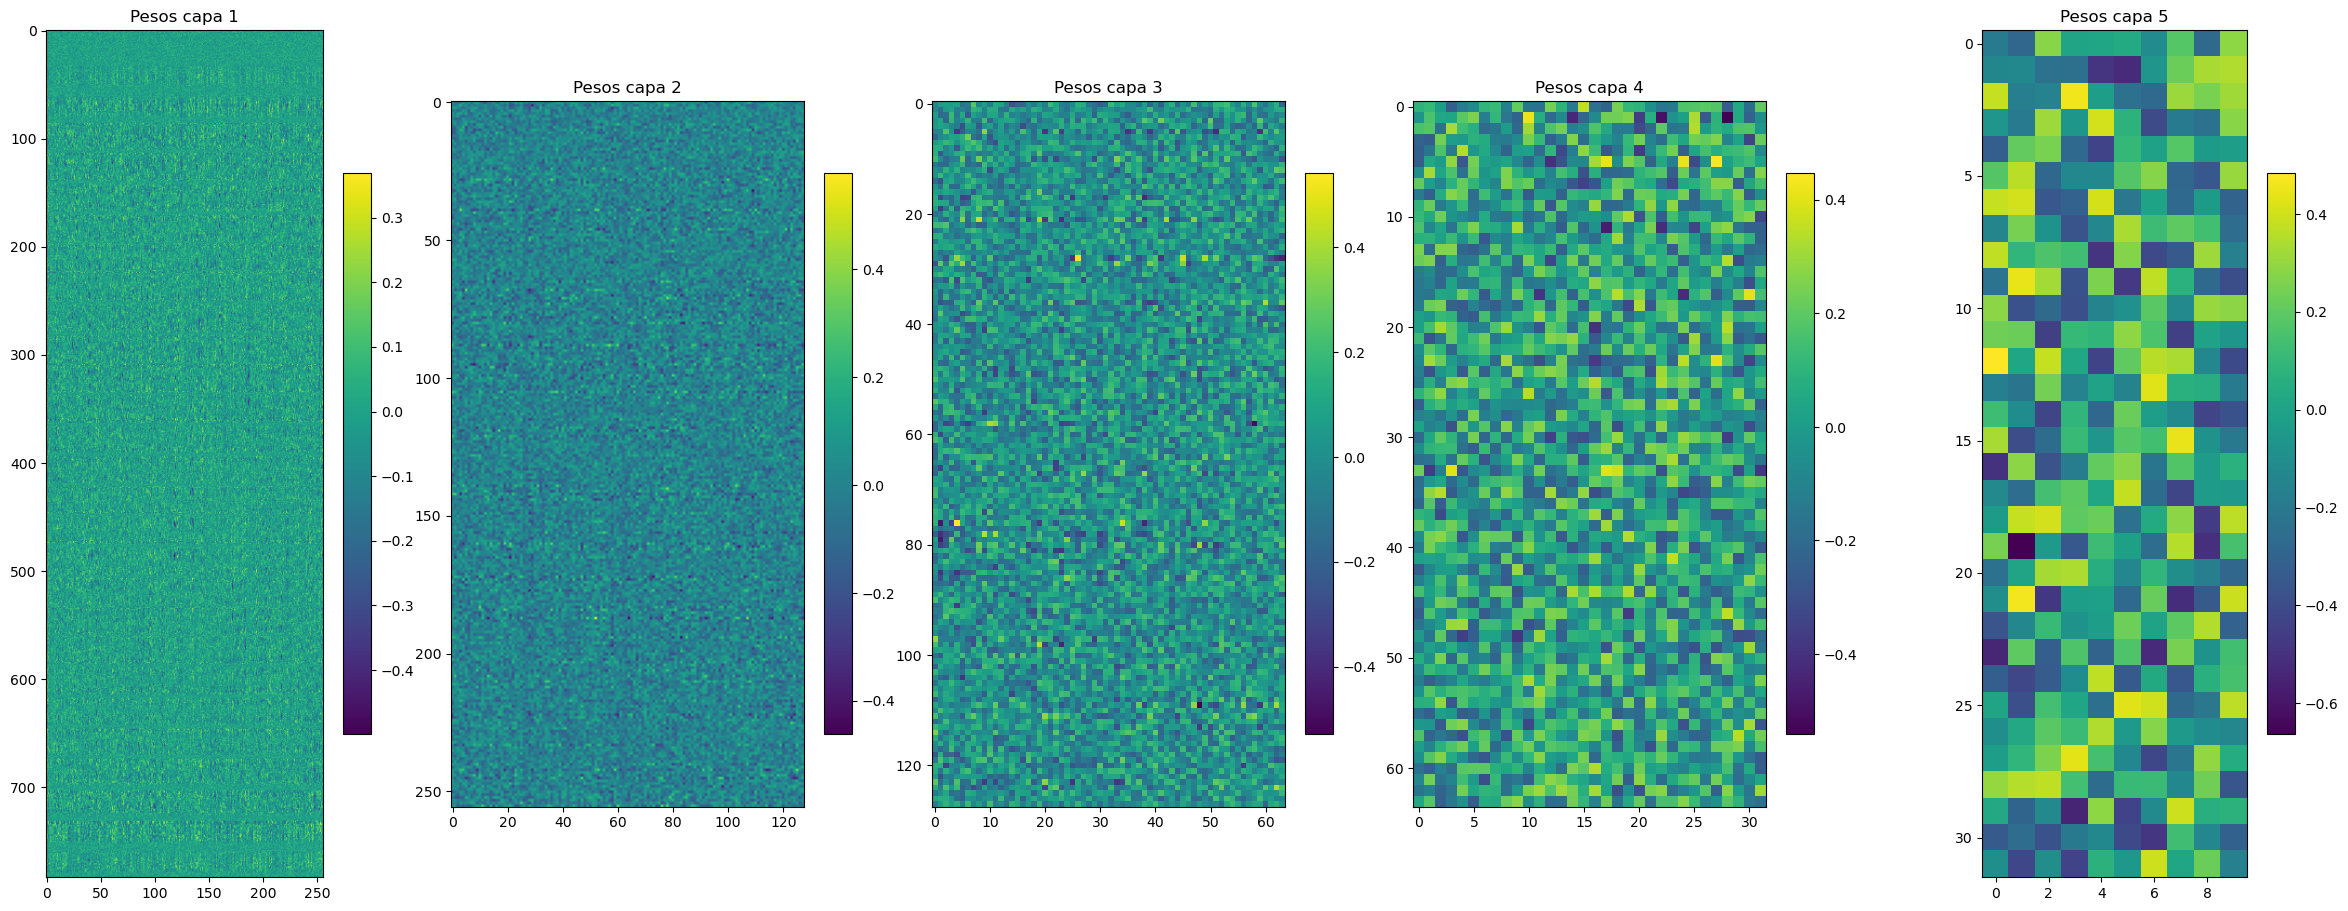

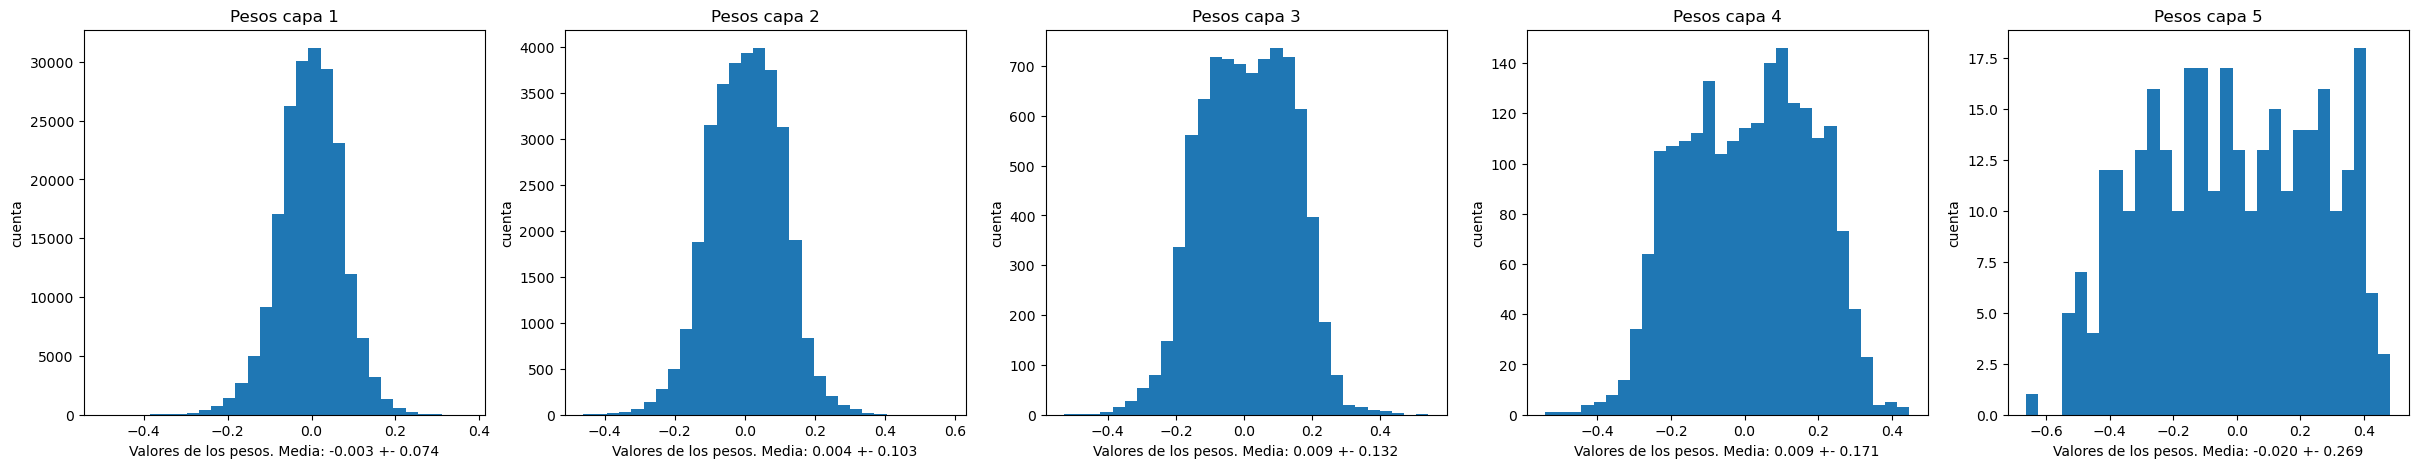

In [9]:
def plot_weights(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 11))
  cnt = 1
  for layer in layers:
      plt.subplot(1, n_img_show, cnt)
      plt.imshow(layer.get_weights()[0])
      plt.title(f'Pesos capa {cnt}')
      plt.colorbar(fraction=0.07)
      cnt += 1

def plot_weights_hist(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 5))
  cnt = 1
  for layer in layers:
    if layer.name.startswith('dense'):
      plt.subplot(1, n_img_show, cnt)
      plt.hist(layer.get_weights()[0].flatten(), bins=30)
      plt.title(f'Pesos capa {cnt}')
      mean = np.mean(layer.get_weights()[0])
      std = np.std(layer.get_weights()[0])
      plt.xlabel(f'Valores de los pesos. Media: {mean:.3f} +- {std:.3f}')
      plt.ylabel('cuenta')
      cnt +=1

plot_weights(model)
plot_weights_hist(model)

## Regularización del modelo con L2
Crea un modelo nuevo exactamente igual que el anterior y añade regularización L2 en todas las capas (menos en la de salida, como es obvio). Prueba distintos valores (0.1, 0.01 y 0.001) y observa cual es el comportamiento.



In [28]:
tf.keras.backend.clear_session()
n_epochs = 50
regularizer = regularizers.l2(0.005)
lr = .001
batch_size = 512
n_epochs = 50
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


# Crear modelo
model_with_l2 = tf.keras.models.Sequential()
model_with_l2.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizer, input_shape = (X_train.shape[1],)))
model_with_l2.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizer))
model_with_l2.add(Dense(units = 64, activation = 'relu', kernel_regularizer=regularizer))
model_with_l2.add(Dense(units = 32, activation = 'relu', kernel_regularizer=regularizer))
model_with_l2.add(Dense(units = 10, activation = 'softmax'))

# Compilamos el modelo
model_with_l2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Entrenamos
hist = model_with_l2.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1,
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/50
118/118 [==============================] - 3s 19ms/step - loss: 2.2201 - accuracy: 0.8135 - val_loss: 1.1403 - val_accuracy: 0.9174
Epoch 2/50
118/118 [==============================] - 2s 19ms/step - loss: 0.9497 - accuracy: 0.9230 - val_loss: 0.7955 - val_accuracy: 0.9343
Epoch 3/50
118/118 [==============================] - 3s 25ms/step - loss: 0.7290 - accuracy: 0.9370 - val_loss: 0.6602 - val_accuracy: 0.9439
Epoch 4/50
118/118 [==============================] - 3s 23ms/step - loss: 0.6225 - accuracy: 0.9467 - val_loss: 0.6232 - val_accuracy: 0.9342
Epoch 5/50
118/118 [==============================] - 2s 19ms/step - loss: 0.5675 - accuracy: 0.9513 - val_loss: 0.5407 - val_accuracy: 0.9509
Epoch 6/50
118/118 [==============================] - 2s 16ms/step - loss: 0.5251 - accuracy: 0.9541 - val_loss: 0.5119 - val_accuracy: 0.9540
Epoch 7/50
118/118 [==============================] - 2s 13ms/step - loss: 0.4996 - accuracy: 0.9554 - val_loss: 0.4748 - val_accuracy: 0.9598

### Evaluación del modelo con regularización L2

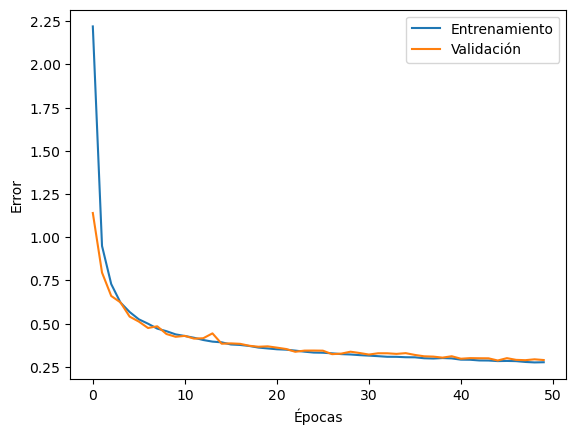

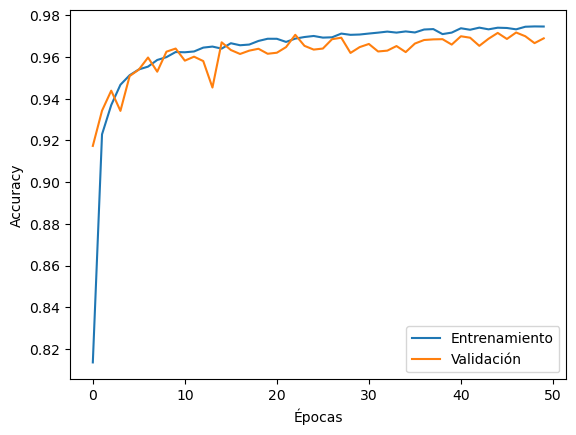

In [29]:
plot_curves(hist.history)

### Visualización de los pesos

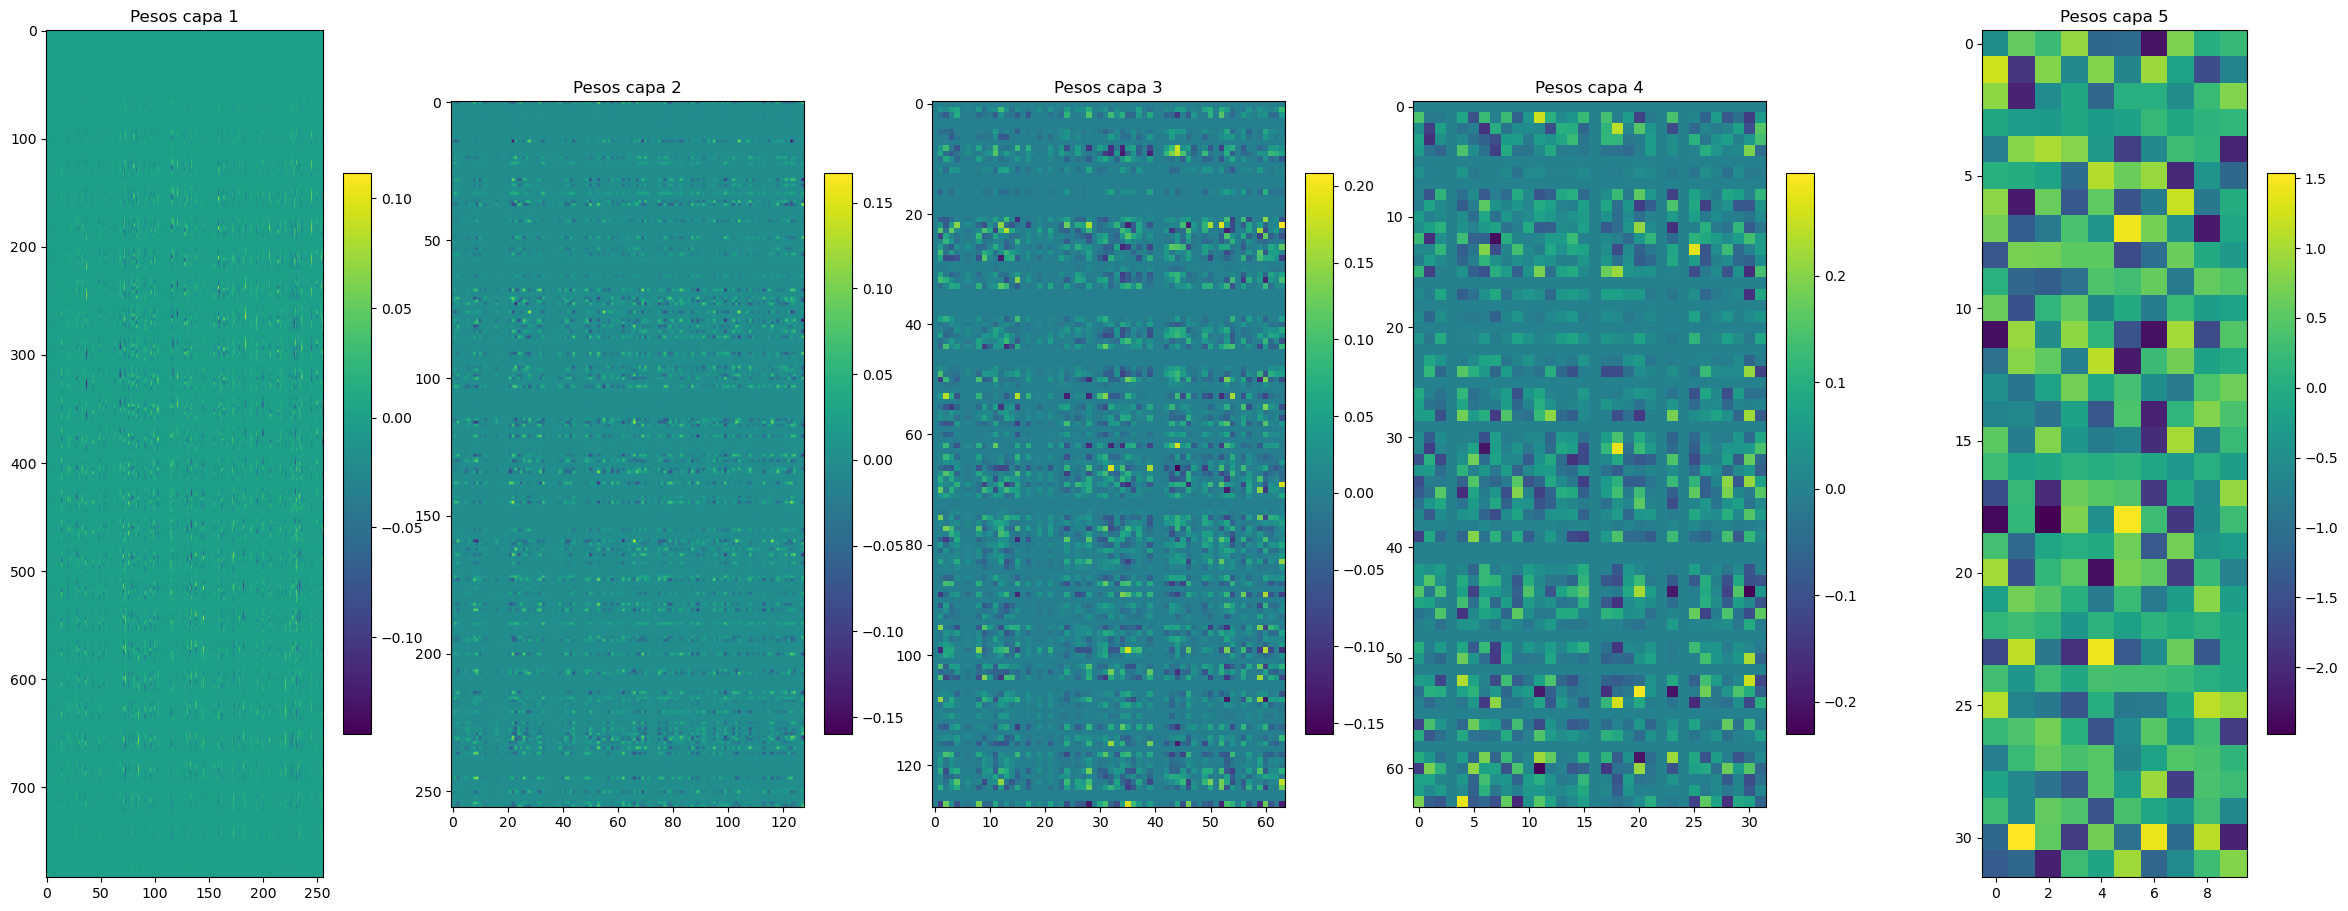

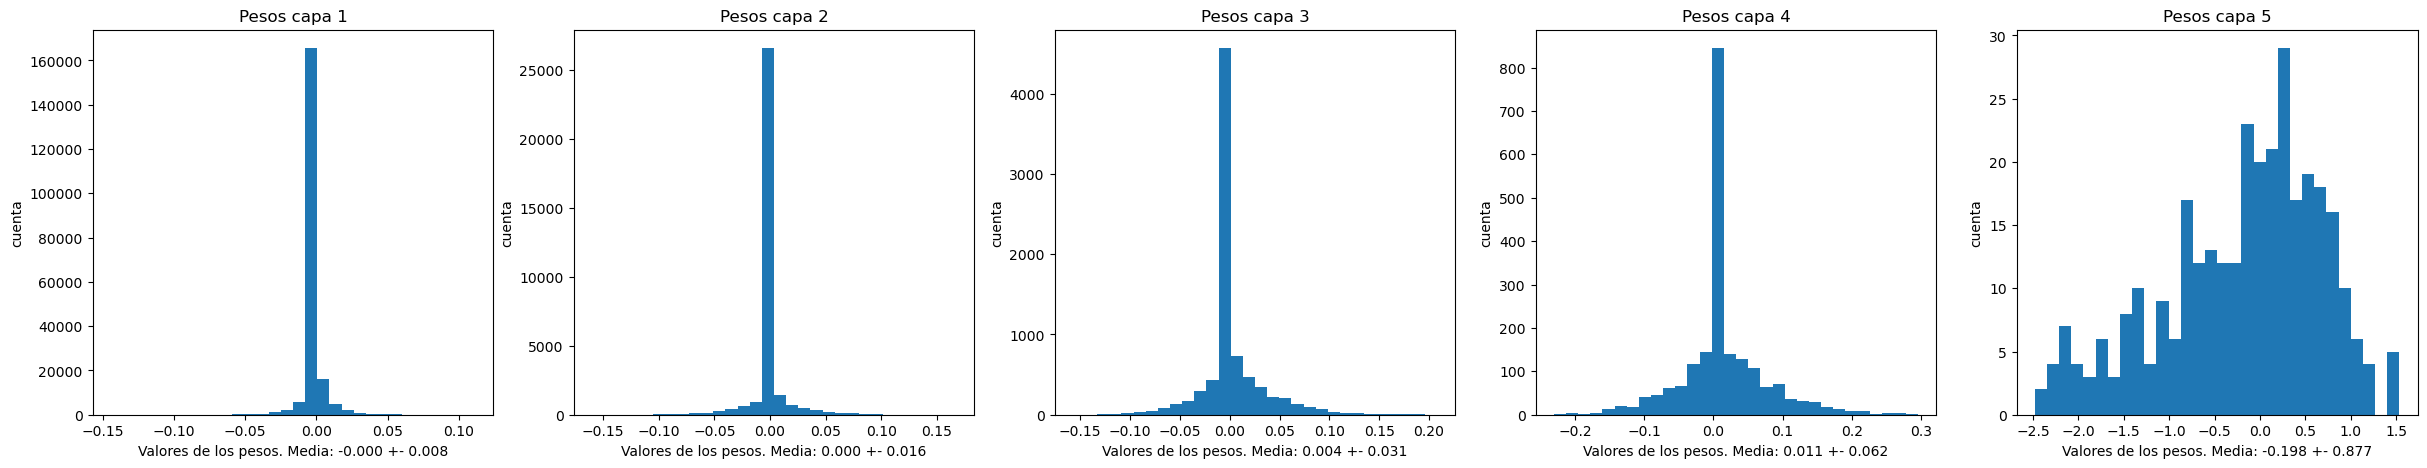

In [30]:
plot_weights(model_with_l2)
plot_weights_hist(model_with_l2)

## Regularización del modelo con Dropout
Ahora crea el mismo modelo pero añade dropout. Prueba distintos valores de dropout.

In [33]:
tf.keras.backend.clear_session()

# Crear modelo
n_epochs = 25
lr = .001
dropout_val = 0.5
batch_size = 512
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


# Crear modelo
model_with_dp = tf.keras.models.Sequential()
model_with_dp.add(Dense(units = 256, activation = 'relu', input_shape = (X_train.shape[1],)))
model_with_dp.add(Dropout(dropout_val))
model_with_dp.add(Dense(units = 128, activation = 'relu'))
model_with_dp.add(Dropout(dropout_val))
model_with_dp.add(Dense(units = 64, activation = 'relu'))
model_with_dp.add(Dropout(dropout_val))
model_with_dp.add(Dense(units = 32, activation = 'relu'))
model_with_dp.add(Dropout(dropout_val))
model_with_dp.add(Dense(units = 10, activation = 'softmax'))


# Compilamos el modelo
model_with_dp.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

# Entrenamos
hist = model_with_dp.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1, 
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 3s 22ms/step - loss: 1.8345 - accuracy: 0.3239 - val_loss: 0.6981 - val_accuracy: 0.7966
Epoch 2/25
118/118 [==============================] - 3s 26ms/step - loss: 0.8817 - accuracy: 0.7022 - val_loss: 0.3335 - val_accuracy: 0.9204
Epoch 3/25
118/118 [==============================] - 3s 23ms/step - loss: 0.6086 - accuracy: 0.8206 - val_loss: 0.2360 - val_accuracy: 0.9422
Epoch 4/25
118/118 [==============================] - 2s 18ms/step - loss: 0.4893 - accuracy: 0.8644 - val_loss: 0.2037 - val_accuracy: 0.9481
Epoch 5/25
118/118 [==============================] - 2s 18ms/step - loss: 0.4225 - accuracy: 0.8872 - val_loss: 0.1817 - val_accuracy: 0.9544
Epoch 6/25
118/118 [==============================] - 2s 19ms/step - loss: 0.3782 - accuracy: 0.9002 - val_loss: 0.1741 - val_accuracy: 0.9582
Epoch 7/25
118/118 [==============================] - 2s 20ms/step - loss: 0.3515 - accuracy: 0.9112 - val_loss: 0.1645 - val_accuracy: 0.9603

### Evaluación del modelo con Dropout

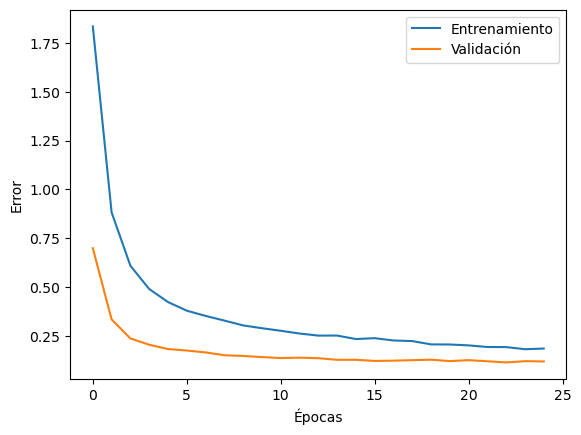

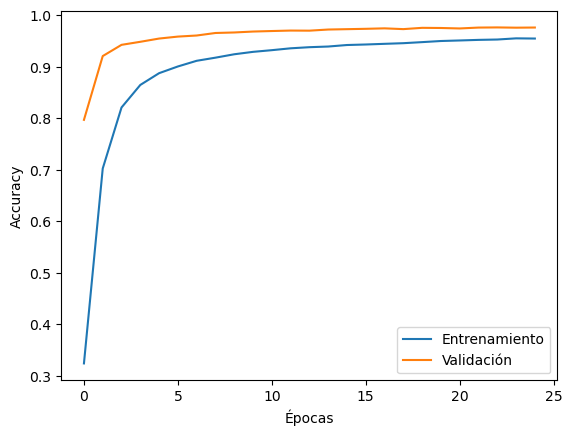

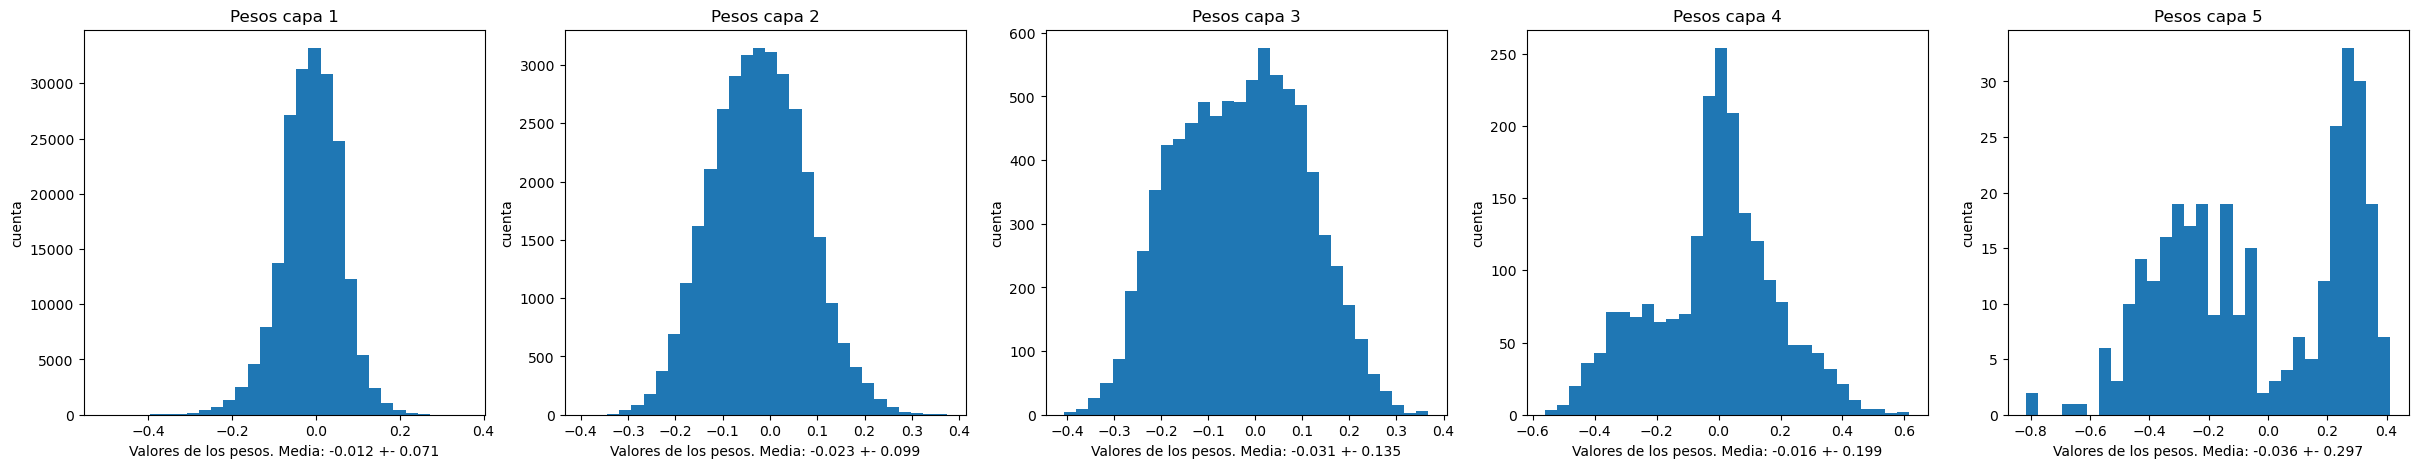

In [34]:
# Plots
plot_curves(hist.history)
# plot_weights(model_with_dp)
plot_weights_hist(model_with_dp)